## Exploring and Ploting NetCDF MERRA-2 data

In [6]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

The second Modern-Era Retrospective analysis for Research and Applications (MERRA-2) is a NASA atmospheric reanalysis that begins in 1980.

The GES DISC is the home (archive) of NASA Precipitation and Hydrology, as well as Atmospheric Composition and Dynamics remote sensing data and information.


In [7]:
ds = nc.Dataset('MERRA2_400.tavg1_2d_slv_Nx.20220101.nc4',mode='r')

In [8]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Sun Feb 20 04:32:39 2022 GMT
    Comment: GMAO filename: d5124_m2_jan10.tavg1_2d_slv_Nx.20220101.nc4
    Filename: MERRA2_400.tavg1_2d_slv_Nx.20220101.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2T1NXSLV
    GranuleID: MERRA2_400.tavg1_2d_slv_Nx.20220101.nc4
    ProductionDateTime: Original file generated: Sun Feb 20 04:32:39 2022 GMT
    LongName: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Single-Level Diagnostics
    Title: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Single-Level Diagnostics
    SouthernmostLatitude: -90.0



### Used Vars:
**T2M**:2-meter air temperature with Kelven unit of measure

For a summary of all respective variables description of any MERRA-2 dataset, you could checkout [**this document**](https://gmao.gsfc.nasa.gov/pubs/docs/Bosilovich785.pdf)

In [9]:
lons = ds.variables['lon'][:]
lats = ds.variables['lat'][:]
T2M = ds.variables['T2M'][:,:,:]
T2M = T2M[0,:,:]

In [3]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import requests, os
  
# Making a get request
response = requests.get('https://geeksforgeeks.org')
  
# print response
print(response)
  
# print iter_content data
print(response.iter_content())
path = "new_files/"
isExist = os.path.exists(path)

if not isExist:
  # Create a new directory because it does not exist 
  os.makedirs(path)
  print("The new directory is created!")


with open(path+'filename', 'wb') as fd:
    for chunk in response.iter_content(chunk_size=1024*1024):
        fd.write(chunk)

<Response [200]>
<generator object iter_slices at 0x7f84f49e5e00>
The new directory is created!


In [3]:
url = "https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXSLV.5.12.4/2022/01/MERRA2_400.tavg1_2d_slv_Nx.20220101.nc4"
    # extract the filename from the url to be used when saving the file
filename = url[url.rfind('/')+1:]
filename

'MERRA2_400.tavg1_2d_slv_Nx.20220101.nc4'

## Using numpy, netCDF4, matplotlib, and cartopy to plot MERRA-2 T2M data

/tmp/ipykernel_21314/707013911.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


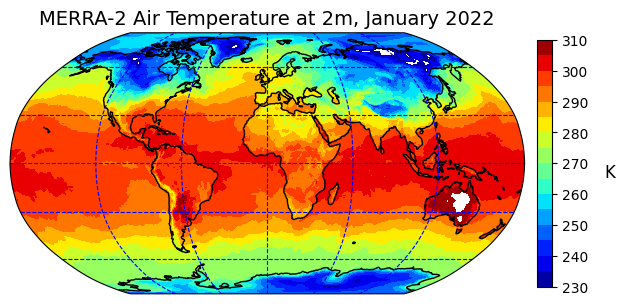

In [5]:
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='blue')

# Set contour levels, then draw the plot and a colorbar
clevs = np.arange(230,311,5)
plt.contourf(lons, lats, T2M, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Air Temperature at 2m, January 2022', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

# Save the plot as a PNG image
fig.show()
fig.savefig('MERRA2_t2m.png', format='png', dpi=360)